In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split

In [2]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
df = pd.read_csv(TRAIN_PATH)

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2)

In [9]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
37174,3,0,0,0,0,0,0,0,0,0,...,136,194,0,0,0,0,0,0,0,0
41082,2,0,0,0,0,0,0,0,0,1,...,0,0,0,9,199,216,94,0,0,0
56029,6,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
51518,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18874,0,0,0,0,0,0,0,9,111,145,...,1,0,0,0,0,0,0,0,0,0
40017,8,0,0,0,0,0,0,0,0,0,...,123,149,160,129,120,129,0,0,0,0
55511,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11975,1,0,0,0,0,0,0,0,0,0,...,114,0,0,0,0,0,0,0,0,0
1258,6,0,0,0,0,0,0,2,6,0,...,114,94,79,60,0,0,0,0,0,0
3828,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
def load_df(d):
    X = d.values[:, 1:].astype(np.float32) / 255
    y = d.values[:, 0]
    X_tensor = torch.FloatTensor(X).view(-1, 1, 28, 28)
    y_tensor = torch.LongTensor(y.astype(np.int64))

    y_tensor_onehot = torch.LongTensor(len(y_tensor), 10)
    y_tensor_onehot.zero_()
    y_tensor_onehot.scatter_(1, y_tensor.view(-1, 1), 1)
    
    return X_tensor, y_tensor, y_tensor_onehot

X_train, y_train, y_train_onehot = load_df(train_df)
X_test, y_test, y_test_onehot = load_df(test_df)

In [19]:
batch_size = 128
n_iters = 6000
n_epochs = int(n_iters / (len(X_train) / batch_size))

def validate(X, y):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

    n_correct = 0
    n_total = 0

    with torch.no_grad():
        for X_batch, y_batch in generate_batches(X, y, batch_size):
            y_pred = net(X_batch)
            _, predicted = torch.max(y_pred, 1)
            c = (predicted == y_batch).squeeze()
            for i in range(len(y_pred)):
                label = y_batch[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
                n_correct += c[i].item()
                n_total += 1

    print("Total accuracy: %2d %%" % (n_correct / n_total * 100,))

    for i in range(10):
        print('Accuracy of %11s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

iter 50: 107.8455581665039
iter 100: 82.86175537109375
iter 150: 80.22722625732422
iter 200: 70.61375427246094
Total accuracy: 83 %
Accuracy of T-shirt/top : 83 %
Accuracy of     Trouser : 95 %
Accuracy of    Pullover : 74 %
Accuracy of       Dress : 89 %
Accuracy of        Coat : 58 %
Accuracy of      Sandal : 92 %
Accuracy of       Shirt : 57 %
Accuracy of     Sneaker : 93 %
Accuracy of         Bag : 94 %
Accuracy of  Ankle boot : 91 %
iter 250: 56.30766296386719
iter 300: 48.54954528808594
iter 350: 55.50090408325195
iter 50: 51.58628463745117
iter 100: 61.81230926513672
iter 150: 59.187286376953125
iter 200: 59.744056701660156
Total accuracy: 86 %
Accuracy of T-shirt/top : 86 %
Accuracy of     Trouser : 96 %
Accuracy of    Pullover : 84 %
Accuracy of       Dress : 90 %
Accuracy of        Coat : 68 %
Accuracy of      Sandal : 95 %
Accuracy of       Shirt : 60 %
Accuracy of     Sneaker : 95 %
Accuracy of         Bag : 96 %
Accuracy of  Ankle boot : 94 %
iter 250: 41.79893112182617
it

iter 250: 16.70895767211914
iter 300: 16.643814086914062
iter 350: 16.91119384765625


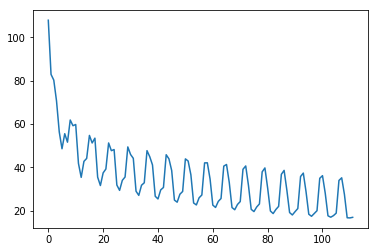

In [21]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        for i in (0, 3):
            nn.init.xavier_uniform_(self.conv[i].weight, gain=np.sqrt(2))
        
        self.fc = nn.Sequential(
            nn.Linear(32*49, 10)
        )
    
    def forward(self, x):
        y = self.conv(x)
        y = y.view(y.size(0), -1)
        y = self.fc(y)
        return y

net = Net()
    
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

losses = []

optimizer = torch.optim.SGD(net.parameters(), lr=1e-3)

for epoch_num in range(n_epochs):
    iter_num = 0
    running_loss = 0.0
    
    for X_batch, y_batch in generate_batches(X_train, y_train, batch_size):
        y_pred = net(X_batch)

        loss = loss_fn(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        iter_num += 1
        
        if iter_num % 50 == 0:
            losses.append(loss.item())
            print(f"iter {iter_num}: {loss.item()}")
        
        if iter_num % 200 == 0:
            validate(X_test, y_test)

plt.plot(losses)

In [22]:
validate(X_test, y_test)

Total accuracy: 90 %
Accuracy of T-shirt/top : 89 %
Accuracy of     Trouser : 98 %
Accuracy of    Pullover : 87 %
Accuracy of       Dress : 92 %
Accuracy of        Coat : 87 %
Accuracy of      Sandal : 96 %
Accuracy of       Shirt : 64 %
Accuracy of     Sneaker : 96 %
Accuracy of         Bag : 98 %
Accuracy of  Ankle boot : 97 %


In [23]:
validate(X_train, y_train)

Total accuracy: 93 %
Accuracy of T-shirt/top : 93 %
Accuracy of     Trouser : 99 %
Accuracy of    Pullover : 90 %
Accuracy of       Dress : 94 %
Accuracy of        Coat : 92 %
Accuracy of      Sandal : 97 %
Accuracy of       Shirt : 74 %
Accuracy of     Sneaker : 97 %
Accuracy of         Bag : 99 %
Accuracy of  Ankle boot : 98 %


In [24]:
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'
sol_df = pd.read_csv(TEST_PATH)

In [25]:
X_sol = sol_df.values

y_sol_pred = net(torch.FloatTensor(X_sol).view(-1, 1, 28, 28) / 255)

print(y_sol_pred)

_, predicted = torch.max(y_sol_pred, 1)

print(predicted)

answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df['Id'] = answer_df.index
answer_df.to_csv('./ans3.csv', index=False)

tensor([[ 12.1913,  -3.3238,   2.7892,  ...,  -4.6397,   1.2751,  -9.1385],
        [  0.7402,  16.0077,  -4.1458,  ...,  -3.4088,   0.1698,  -5.1358],
        [  6.6554,  -3.6935,   9.7992,  ..., -10.0120,  -5.7297,  -7.4387],
        ...,
        [ -6.7210,  -4.4854,   0.3364,  ...,  -1.2312,  18.3561,  -2.5047],
        [  1.3509,  -3.6289,  -0.2282,  ...,  -6.3220,  13.0575,  -1.7885],
        [  2.5553,   6.5483,   0.9456,  ...,  -6.6711,   3.1905,  -4.4892]],
       grad_fn=<AddmmBackward>)
tensor([0, 1, 6,  ..., 8, 8, 1])


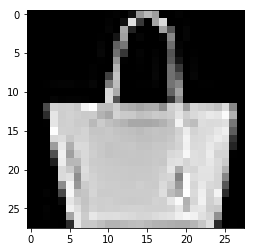

In [31]:
# classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
#                'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

plt.imshow(X_sol[-3].reshape(28, 28), cmap="gray")